Notes Variable dataset store

- df
- df1
- df_scaled
- df_feature
- df_filtered (Label encode)
- df_filtered1 (One hot encode)


- customerID: ID unik untuk setiap pelanggan dalam dataset.
- gender: Jantina pelanggan (Male/Female).
- SeniorCitizen: Menunjukkan sama ada pelanggan adalah warga emas (1 = Ya, 0 = Tidak).
- Partner: Menunjukkan sama ada pelanggan mempunyai pasangan (Yes/No).
- Dependents: Menunjukkan sama ada pelanggan mempunyai tanggungan (Yes/No).
- tenure: Tempoh masa pelanggan telah menjadi pelanggan syarikat telekomunikasi tersebut (dalam bulan).
- PhoneService: Menunjukkan sama ada pelanggan menggunakan perkhidmatan telefon (Yes/No).
- MultipleLines: Menunjukkan sama ada pelanggan mempunyai lebih daripada satu talian telefon (Yes/No/No phone service).
- InternetService: Jenis perkhidmatan internet yang digunakan oleh pelanggan (DSL/Fiber optic/No).
- OnlineSecurity: Menunjukkan sama ada pelanggan melanggan perkhidmatan keselamatan dalam talian (Yes/No/No internet service)
- OnlineBackup: Menunjukkan sama ada pelanggan melanggan perkhidmatan sandaran dalam talian (Yes/No/No internet service).
- DeviceProtection: Menunjukkan sama ada pelanggan melanggan perkhidmatan perlindungan peranti (Yes/No/No internet service).
- TechSupport: Menunjukkan sama ada pelanggan melanggan perkhidmatan sokongan teknikal (Yes/No/No internet service).
- StreamingTV: Menunjukkan sama ada pelanggan melanggan perkhidmatan TV streaming (Yes/No/No internet service).
- StreamingMovies: Menunjukkan sama ada pelanggan melanggan perkhidmatan filem streaming (Yes/No/No internet service).
- Contract: Jenis kontrak yang dipilih pelanggan (Month-to-month/One year/Two year).
- PaperlessBilling: Menunjukkan sama ada pelanggan melanggan bil tanpa kertas (Yes/No).
- PaymentMethod: Kaedah pembayaran yang digunakan oleh pelanggan (Electronic check/Mailed check/Bank transfer (automatic)/Credit card (automatic)).
- MonthlyCharges: Caj bulanan yang dikenakan kepada pelanggan.
- TotalCharges: Jumlah caj keseluruhan yang dikenakan kepada pelanggan.
- Churn: Sasaran (target) dalam analisis ini; menunjukkan sama ada pelanggan telah berhenti melanggan (Yes/No).

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('Data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [6]:
df.shape

(7043, 21)

In [7]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

### Dont have duplicate Values (Compare No unique value - EmployeeNumber with number of rows)

<Axes: >

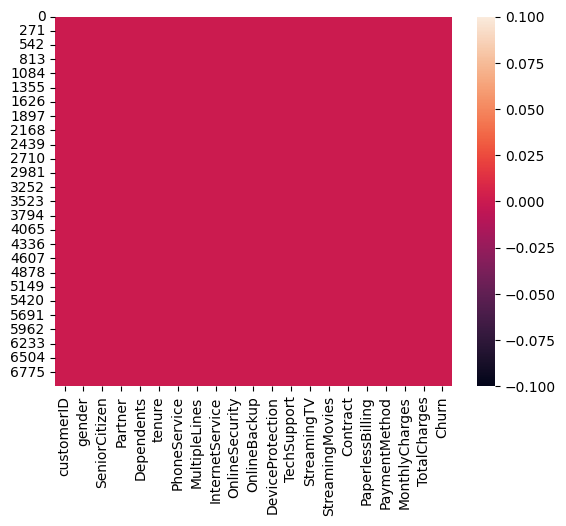

In [8]:
sns.heatmap(df.isnull())

In [9]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [13]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [14]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [15]:
# Get the percentage of each unique value in the 'Attrition' column
Churn_percentage = df['Churn'].value_counts(normalize=True) * 100

# Print the result
print(Churn_percentage )

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


## Anamolies Detection 

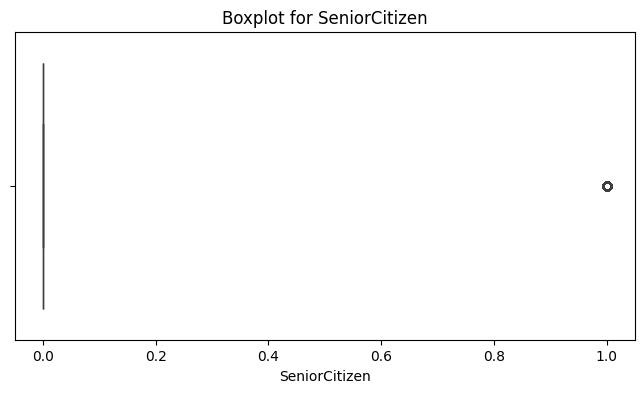

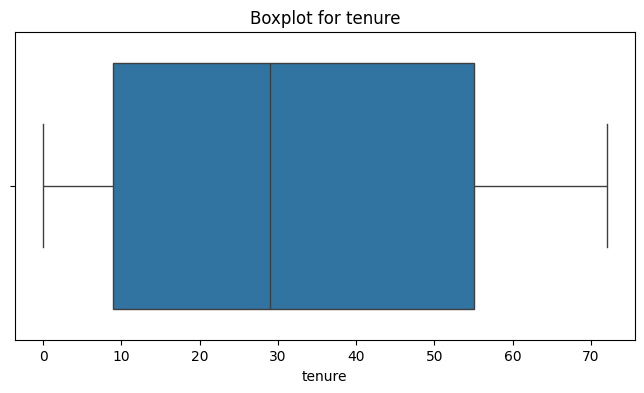

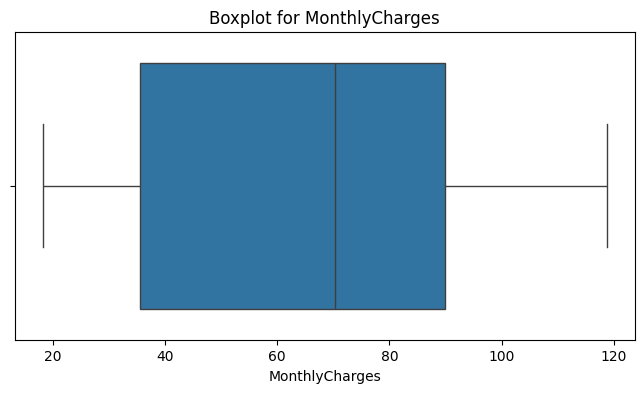

In [16]:
# Fir this first im using BOXPLOT

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot boxplot untuk setiap kolum numerik
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot for {col}")
    plt.show()

In [17]:
df['SeniorCitizen'].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

## Drop the not relevant column for analysis (Customer id)

In [18]:
df1 = df.copy()

df1.drop(['customerID'],axis = 1, inplace = True)

In [19]:
df1.shape

(7043, 20)

In [20]:
df1.head(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No


## Eccoding to do feature Importance

In [21]:
from sklearn.preprocessing import LabelEncoder


categorical_features = df1.select_dtypes(include=['object']).columns

label_encoder = LabelEncoder()


for feature in categorical_features:
    df1[feature] = label_encoder.fit_transform(df1[feature])

df1.head(2)



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0


In [22]:
df1.shape

(7043, 20)

## Scalling
- Standarscaler

In [23]:
from sklearn.preprocessing import StandardScaler

# Salin DataFrame asal
df_scaled = df1.copy()

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Ciri numerik yang perlu diskalakan
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Lakukan penyesuaian skala hanya pada ciri yang dipilih
df_scaled[numerical_features] = scaler.fit_transform(df1[numerical_features])

# Paparkan DataFrame yang telah diskala
df_scaled.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.277445,0,1,0,0,2,0,0,0,0,0,1,2,-1.160323,-0.398608,0
1,1,0,0,0,0.066327,1,0,0,2,0,2,0,0,0,1,0,3,-0.259629,-0.948762,0
2,1,0,0,0,-1.236724,1,0,0,2,2,0,0,0,0,0,1,3,-0.362660,-1.641883,1
3,1,0,0,0,0.514251,0,1,0,2,0,2,2,0,0,1,0,0,-0.746535,-0.983710,0
4,0,0,0,0,-1.236724,1,0,1,0,0,0,0,0,0,0,1,2,0.197365,-1.235224,1


## Run model Random forest 
- Run train and Test report

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Pisahkan ciri (X) dan label (y)
X = df_scaled.drop('Churn', axis=1)  # 'Attrition' adalah target
y = df_scaled['Churn']

# Bahagikan data kepada set latihan dan set ujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)




In [25]:
X_train.shape

(5634, 19)

In [26]:
 X_test.shape

(1409, 19)

In [27]:
y_train.value_counts()

Churn
0    4139
1    1495
Name: count, dtype: int64

In [28]:
y_test.value_counts()

Churn
0    1035
1     374
Name: count, dtype: int64

In [29]:
# Latih model Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Ramal pada data ujian
y_test_pred = rf_model.predict(X_test)
y_train_pred = rf_model.predict(X_train)


# Laporan prestasi untuk set latihan
print("\n=== Performance on Train Set ===")
print("Accuracy (Train):", accuracy_score(y_train, y_train_pred))
print("\nClassification Report (Train):")
print(classification_report(y_train, y_train_pred))

print(' ')
print('--------------'*5)
print(' ')


# Laporan prestasi untuk set ujian
print("=== Performance on Test Set ===")
print("Accuracy (Test):", accuracy_score(y_test, y_test_pred))
print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred))




=== Performance on Train Set ===
Accuracy (Train): 0.9980475683351083

Classification Report (Train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4139
           1       1.00      1.00      1.00      1495

    accuracy                           1.00      5634
   macro avg       1.00      1.00      1.00      5634
weighted avg       1.00      1.00      1.00      5634

 
----------------------------------------------------------------------
 
=== Performance on Test Set ===
Accuracy (Test): 0.7892122072391767

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



# Tune

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 15, 'n_estimators': 50}

Cross-Validation Scores: [0.79148181 0.7905945  0.78527063 0.78172138 0.74333925]
Mean CV Accuracy: 0.7784815153955628

=== Performance on Train Set ===
Accuracy (Train): 0.8485977990770323

Classification Report (Train):
              precision    recall  f1-score   support

           0       0.95      0.84      0.89      4139
           1       0.66      0.87      0.75      1495

    accuracy                           0.85      5634
   macro avg       0.81      0.85      0.82      5634
weighted avg       0.87      0.85      0.85      5634


=== Performance on Test Set ===
Accuracy (Test): 0.7643718949609652

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1035
           1       0.54      0.73      0.62       374

    accuracy       

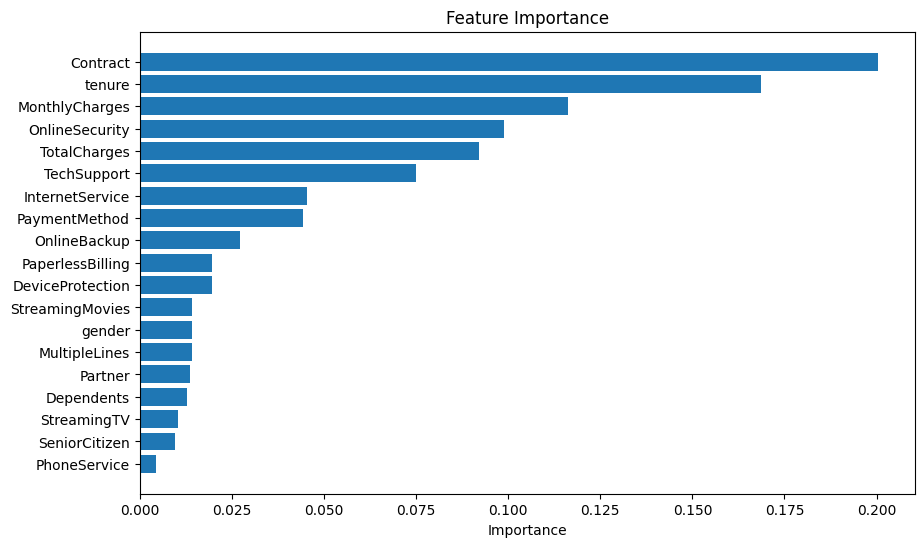

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


# Model Random Forest dengan hyperparameter tuning
rf = RandomForestClassifier(random_state=42, class_weight="balanced")

# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [5, 10, 15],
    'min_samples_leaf': [5, 10]
}

# GridSearchCV untuk mencari parameter terbaik
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

# Latih model dengan GridSearchCV
grid_search.fit(X_train, y_train)

# Model terbaik berdasarkan GridSearchCV
best_model = grid_search.best_estimator_

# Cetak parameter terbaik
print("Best Parameters:", grid_search.best_params_)

# Penilaian menggunakan cross-validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
print("\nCross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

# Latih model terbaik pada data latihan
best_model.fit(X_train, y_train)

# Ramalan pada data ujian
y_test_pred = best_model.predict(X_test)
y_train_pred = best_model.predict(X_train)

# Laporan prestasi untuk set latihan
print("\n=== Performance on Train Set ===")
print("Accuracy (Train):", accuracy_score(y_train, y_train_pred))
print("\nClassification Report (Train):")
print(classification_report(y_train, y_train_pred))

# Laporan prestasi untuk set ujian
print("\n=== Performance on Test Set ===")
print("Accuracy (Test):", accuracy_score(y_test, y_test_pred))
print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred))

# Feature importance
feature_importance = best_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# Paparkan feature importance
print("\n=== Feature Importance ===")
print(importance_df)

# Visualisasi feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()  # Invert y-axis supaya yang paling penting di atas
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()


## Using Threshold Mean Feature Importance ( Feature selection )

In [31]:
# Dapatkan purata importance
mean_importance = importance_df['Importance'].mean()

# Pilih ciri dengan importance > mean
selected_features = importance_df[importance_df['Importance'] > mean_importance]

# Ciri-ciri yang dipilih
print("\nSelected Features (Importance > Mean):")
print(selected_features)

# Pilih hanya ciri-ciri yang dipilih
X_train_selected = X_train[selected_features['Feature']]
X_test_selected = X_test[selected_features['Feature']]



Selected Features (Importance > Mean):
           Feature  Importance
14        Contract    0.200376
4           tenure    0.168621
17  MonthlyCharges    0.116200
8   OnlineSecurity    0.098771
18    TotalCharges    0.092103
11     TechSupport    0.074966


## Predictive modelling

## Encode (ONE HOT ENCODE)

In [48]:
df_final = df.copy()

# Senarai ciri yang ingin dikekalkan berdasarkan Feature Importance
selected_features1 = ['Contract', 'tenure', 'MonthlyCharges', 'OnlineSecurity', 'TotalCharges', 'TechSupport', 'Churn']

# Drop ciri-ciri yang tidak berkaitan daripada df_feature
df_filtered1 = df_final[selected_features1]

# Paparkan DataFrame yang telah ditapis
df_filtered1.head()


,Contract,tenure,MonthlyCharges,OnlineSecurity,TotalCharges,TechSupport,Churn
0,Month-to-month,1,29.85,No,29.85,No,No
1,One year,34,56.95,Yes,1889.5,No,No
2,Month-to-month,2,53.85,Yes,108.15,No,Yes
3,One year,45,42.30,Yes,1840.75,Yes,No
4,Month-to-month,2,70.70,No,151.65,No,Yes


In [49]:
df_filtered1['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [50]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming df_filtered1 is your DataFrame
# Encoding the target variable Y (Churn) - binary encoding
le = LabelEncoder()
df_filtered1['Churn'] = le.fit_transform(df_filtered1['Churn'])

# One-hot encoding categorical variables: Contract, OnlineSecurity, TechSupport
df_filtered1 = pd.get_dummies(df_filtered1, columns=['Contract', 'OnlineSecurity', 'TechSupport'], drop_first=False)

# Check the result
df_filtered1.head()


C:\Users\User\AppData\Local\Temp\ipykernel_9248\1664222783.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered1['Churn'] = le.fit_transform(df_filtered1['Churn'])


,tenure,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes
0,1,29.85,29.85,0,True,False,False,True,False,False,True,False,False
1,34,56.95,1889.5,0,False,True,False,False,False,True,True,False,False
2,2,53.85,108.15,1,True,False,False,False,False,True,True,False,False
3,45,42.30,1840.75,0,False,True,False,False,False,True,False,False,True
4,2,70.70,151.65,1,True,False,False,True,False,False,True,False,False


In [51]:
df_filtered1.head().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   tenure                              5 non-null      int64  
 1   MonthlyCharges                      5 non-null      float64
 2   TotalCharges                        5 non-null      object 
 3   Churn                               5 non-null      int64  
 4   Contract_Month-to-month             5 non-null      bool   
 5   Contract_One year                   5 non-null      bool   
 6   Contract_Two year                   5 non-null      bool   
 7   OnlineSecurity_No                   5 non-null      bool   
 8   OnlineSecurity_No internet service  5 non-null      bool   
 9   OnlineSecurity_Yes                  5 non-null      bool   
 10  TechSupport_No                      5 non-null      bool   
 11  TechSupport_No internet service     5 non-null   

In [52]:
# Convert TotalCharges to numeric, forcing errors to NaN
df_filtered1['TotalCharges'] = pd.to_numeric(df_filtered1['TotalCharges'], errors='coerce')

# If you want to fill NaN values with 0 (or any other appropriate value)
df_filtered1['TotalCharges'].fillna(0, inplace=True)



C:\Users\User\AppData\Local\Temp\ipykernel_9248\615561583.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filtered1['TotalCharges'].fillna(0, inplace=True)


In [53]:
df_filtered1

,tenure,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes
0,1,29.85,29.85,0,True,False,False,True,False,False,True,False,False
1,34,56.95,1889.50,0,False,True,False,False,False,True,True,False,False
2,2,53.85,108.15,1,True,False,False,False,False,True,True,False,False
3,45,42.30,1840.75,0,False,True,False,False,False,True,False,False,True
4,2,70.70,151.65,1,True,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,0,False,True,False,False,False,True,False,False,True
7039,72,103.20,7362.90,0,False,True,False,True,False,False,True,False,False
7040,11,29.60,346.45,0,True,False,False,False,False,True,True,False,False
7041,4,74.40,306.60,1,True,False,False,True,False,False,True,False,False


## Scalling

In [54]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Select numerical columns to scale
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Apply the scaling
df_filtered1[numerical_columns] = scaler.fit_transform(df_filtered1[numerical_columns])

# Check the result
df_filtered1.head()


,tenure,MonthlyCharges,TotalCharges,Churn,Contract_Month-to-month,Contract_One year,Contract_Two year,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes
0,-1.277445,-1.160323,-0.992611,0,True,False,False,True,False,False,True,False,False
1,0.066327,-0.259629,-0.172165,0,False,True,False,False,False,True,True,False,False
2,-1.236724,-0.362660,-0.958066,1,True,False,False,False,False,True,True,False,False
3,0.514251,-0.746535,-0.193672,0,False,True,False,False,False,True,False,False,True
4,-1.236724,0.197365,-0.938874,1,True,False,False,True,False,False,True,False,False


## predictive modelling

## KNN

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Pisahkan pemboleh ubah sasaran (Churn) dan pemboleh ubah ciri (features)
X1 = df_filtered1.drop('Churn', axis=1)  # Ciri-ciri
y1 = df_filtered1['Churn']  # Sasaran

# Membahagikan data kepada set latihan (80%) dan set ujian (20%)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Membangunkan model KNN
model_knn = KNeighborsClassifier(n_neighbors=5)  # Anda boleh menukar n_neighbors mengikut keperluan

# Melatih model menggunakan data latihan
model_knn.fit(X_train1, y_train1)

# Meramalkan hasil menggunakan data ujian
y_pred_test = model_knn.predict(X_test1)

# Menilai model pada set ujian
accuracy_test = accuracy_score(y_test1, y_pred_test)
conf_matrix_test = confusion_matrix(y_test1, y_pred_test)

# Paparkan keputusan pada set ujian
print(f'Ketepatan Model KNN (Set Ujian): {accuracy_test}')
print(f'Matriks Kekeliruan Model KNN (Set Ujian):\n{conf_matrix_test}')

# Paparkan Classification Report Model KNN (Set Ujian)
class_report_test = classification_report(y_test1, y_pred_test)
print(f'Classification Report Model KNN (Set Ujian):\n{class_report_test}')


Ketepatan Model KNN (Set Ujian): 0.7863733144073811
Matriks Kekeliruan Model KNN (Set Ujian):
[[921 115]
 [186 187]]
Classification Report Model KNN (Set Ujian):
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1036
           1       0.62      0.50      0.55       373

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409



## Tune

In [56]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Pisahkan pemboleh ubah sasaran (Churn) dan pemboleh ubah ciri (features)
X1 = df_filtered1.drop('Churn', axis=1)  # Ciri-ciri
y1 = df_filtered1['Churn']  # Sasaran

# Menyeimbangkan data menggunakan SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X1, y1)

# Menyusun semula data
scaler = StandardScaler()
X_train_rescaled = scaler.fit_transform(X_train_resampled)
X_test_rescaled = scaler.transform(X_test1)

# Membahagikan data kepada set latihan (80%) dan set ujian (20%)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Membangunkan model KNN dengan parameter tuning menggunakan GridSearchCV
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train_rescaled, y_train_resampled)

# Dapatkan model terbaik daripada GridSearchCV
best_model = grid_search.best_estimator_

# Melatih model terbaik menggunakan data latihan yang telah diselaraskan
best_model.fit(X_train_rescaled, y_train_resampled)

# Meramalkan hasil menggunakan data ujian
y_pred_knn = best_model.predict(X_test_rescaled)

# Menilai model
accuracy_knn = accuracy_score(y_test1, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test1, y_pred_knn)

# Paparkan keputusan
print(f'Ketepatan Model KNN selepas Penalaan: {accuracy_knn}')
print(f'Matriks Kekeliruan Model KNN selepas Penalaan:\n{conf_matrix_knn}')

# Paparkan Classification Report Model KNN selepas Penalaan
class_report_knn = classification_report(y_test1, y_pred_knn)
print(f'Classification Report Model KNN selepas Penalaan:\n{class_report_knn}')


Ketepatan Model KNN selepas Penalaan: 0.8743789921930447
Matriks Kekeliruan Model KNN selepas Penalaan:
[[891 145]
 [ 32 341]]
Classification Report Model KNN selepas Penalaan:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1036
           1       0.70      0.91      0.79       373

    accuracy                           0.87      1409
   macro avg       0.83      0.89      0.85      1409
weighted avg       0.90      0.87      0.88      1409



## Random Forest

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Pisahkan pemboleh ubah sasaran (Churn) dan pemboleh ubah ciri (features)
X1 = df_filtered1.drop('Churn', axis=1)  # Ciri-ciri
y1 = df_filtered1['Churn']  # Sasaran

# Membahagikan data kepada set latihan (80%) dan set ujian (20%)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Membangunkan model Random Forest
model_rf = RandomForestClassifier(random_state=42)  # Anda boleh menukar parameter mengikut keperluan

# Melatih model menggunakan data latihan
model_rf.fit(X_train1, y_train1)

# Meramalkan hasil menggunakan data ujian
y_pred_test = model_rf.predict(X_test1)

# Menilai model pada set ujian
accuracy_test = accuracy_score(y_test1, y_pred_test)
conf_matrix_test = confusion_matrix(y_test1, y_pred_test)

# Paparkan keputusan pada set ujian
print(f'Ketepatan Model Random Forest (Set Ujian): {accuracy_test}')
print(f'Matriks Kekeliruan Model Random Forest (Set Ujian):\n{conf_matrix_test}')

# Paparkan Classification Report Model Random Forest (Set Ujian)
class_report_test = classification_report(y_test1, y_pred_test)
print(f'Classification Report Model Random Forest (Set Ujian):\n{class_report_test}')


Ketepatan Model Random Forest (Set Ujian): 0.7764371894960965
Matriks Kekeliruan Model Random Forest (Set Ujian):
[[912 124]
 [191 182]]
Classification Report Model Random Forest (Set Ujian):
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1036
           1       0.59      0.49      0.54       373

    accuracy                           0.78      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



## Tune

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Ketepatan Model Random Forest: 0.9339957416607523
Matriks Kekeliruan Model Random Forest:
[[973  63]
 [ 30 343]]
Classification Report Model Random Forest:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1036
           1       0.84      0.92      0.88       373

    accuracy                           0.93      1409
   macro avg       0.91      0.93      0.92      1409
weighted avg       0.94      0.93      0.93      1409

Feature Importances:
                                Feature  Importance
1                       MonthlyCharges    0.239185
2                         TotalCharges    0.226259
0                               tenure    0.196061
3              Contract_Month-to-month    0.102953
9                       TechSupport_No    0.066975
5                    Contract_Two year    0.054198
6                    OnlineSecurity_No    0.053037
4                    Con

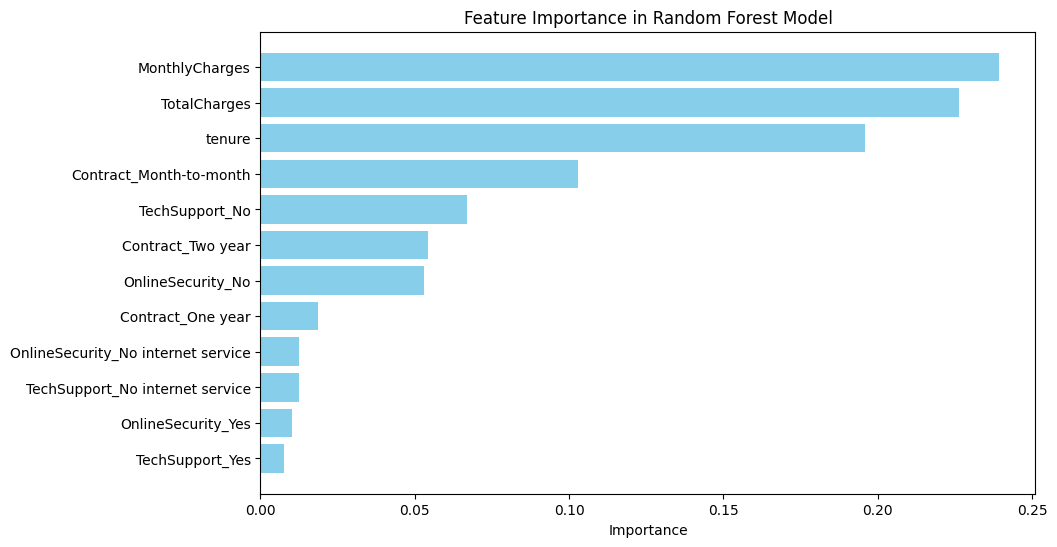

In [58]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import pandas as pd
import matplotlib.pyplot as plt

# Pisahkan pemboleh ubah sasaran (Churn) dan pemboleh ubah ciri (features)
X1 = df_filtered1.drop('Churn', axis=1)  # Ciri-ciri
y1 = df_filtered1['Churn']  # Sasaran

# Menyeimbangkan data menggunakan SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X1, y1)

# Menyusun semula data
scaler = StandardScaler()
X_train_rescaled = scaler.fit_transform(X_train_resampled)
X_test_rescaled = scaler.transform(X_test1)

# Membahagikan data kepada set latihan (80%) dan set ujian (20%)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Membangunkan model Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Penalaan Hiperparameter menggunakan GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_rescaled, y_train_resampled)

# Model terbaik selepas penalaan hiperparameter
best_rf_model = grid_search.best_estimator_

# Melatih model terbaik menggunakan data latihan yang telah diselaraskan
best_rf_model.fit(X_train_rescaled, y_train_resampled)

# Meramalkan hasil menggunakan data ujian
y_pred_rf = best_rf_model.predict(X_test_rescaled)

# Menilai model
accuracy_rf = accuracy_score(y_test1, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test1, y_pred_rf)

# Paparkan keputusan
print(f'Ketepatan Model Random Forest: {accuracy_rf}')
print(f'Matriks Kekeliruan Model Random Forest:\n{conf_matrix_rf}')

# Paparkan Classification Report Model Random Forest
class_report_rf = classification_report(y_test1, y_pred_rf)
print(f'Classification Report Model Random Forest:\n{class_report_rf}')

# Feature Importance
feature_importances = best_rf_model.feature_importances_

# Convert feature importance into a DataFrame for better readability
feature_importance_df = pd.DataFrame({
    'Feature': X1.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Feature Importances:\n", feature_importance_df)

# Visualize the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest Model')
plt.gca().invert_yaxis()  # To display the most important feature on top
plt.show()


## Finish

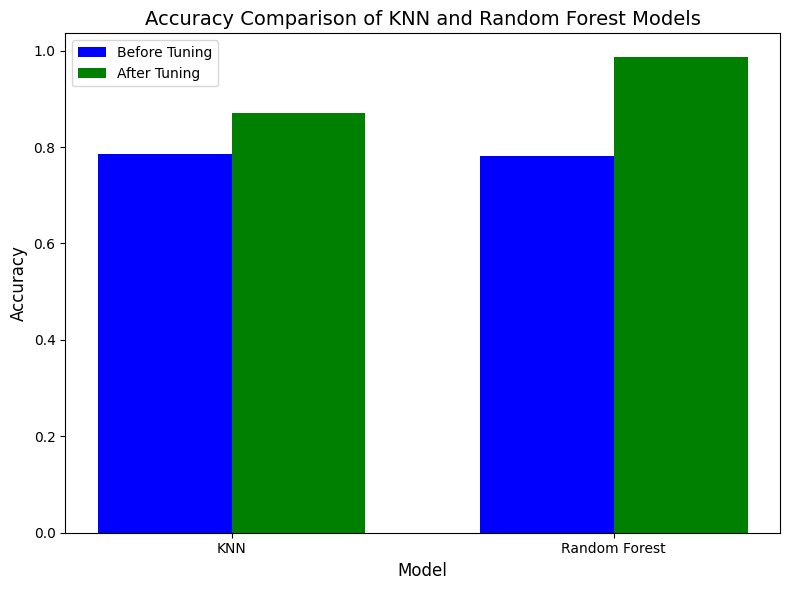

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Accuracy data
accuracy_before = [0.7857, 0.7807]  # KNN and Random Forest before tuning
accuracy_after = [0.8715, 0.9865]   # KNN and Random Forest after tuning
models = ['KNN', 'Random Forest']

# Plot for accuracy comparison
plt.figure(figsize=(8, 6))
bar_width = 0.35
index = np.arange(len(models))

# Plot before and after
plt.bar(index, accuracy_before, bar_width, label='Before Tuning', color='b')
plt.bar(index + bar_width, accuracy_after, bar_width, label='After Tuning', color='g')

plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy Comparison of KNN and Random Forest Models', fontsize=14)
plt.xticks(index + bar_width / 2, models)
plt.legend()

plt.tight_layout()
plt.show()


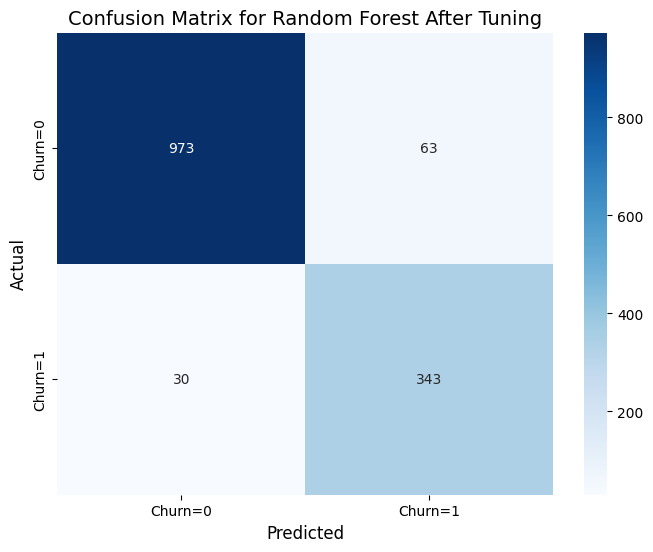

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Confusion Matrix for Random Forest after Tuning
conf_matrix_rf = np.array([[973, 63], [30, 343]])

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Churn=0', 'Churn=1'], yticklabels=['Churn=0', 'Churn=1'])
plt.title('Confusion Matrix for Random Forest After Tuning', fontsize=14)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.show()
